In [1]:
# Step 1: Load the necessary libraries and download the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [3]:
train_data = pd.read_csv("C:\\Users\\vadap\\OneDrive - Teesside University\\Desktop\\AI Assignments\\CHANDRASEKHAR_C2619314\\ML_C2619314\\train.csv)
test_data = pd.read_csv("C:\\Users\\vadap\\OneDrive - Teesside University\\Desktop\\AI Assignments\\CHANDRASEKHAR_C2619314\\ML_C2619314\\test.csv)


SyntaxError: EOL while scanning string literal (<ipython-input-3-f712cf9588d1>, line 1)

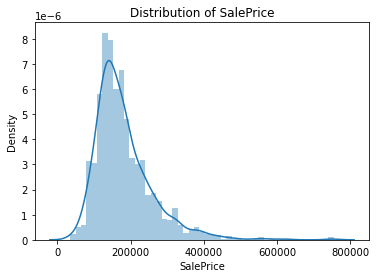

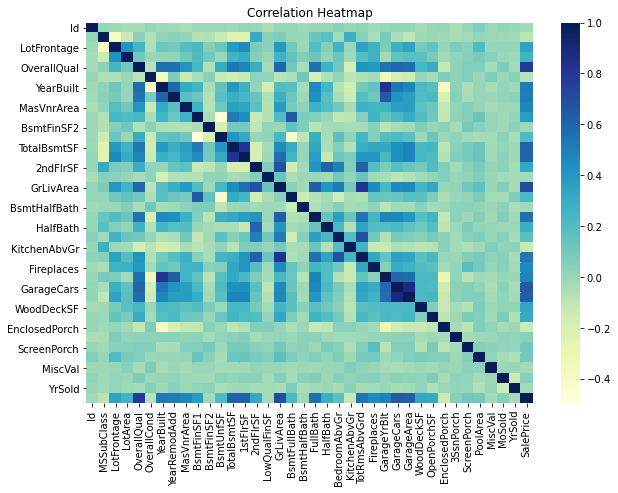

In [3]:
# Step 2: Exploratory Data Analysis (EDA)

# View the distribution of target variable (SalePrice)
sns.distplot(train_data['SalePrice'])
plt.title('Distribution of SalePrice')
plt.show()

# View correlation between numerical features and the target variable
corr = train_data.corr()
plt.figure(figsize=(10, 7))
plt.title('Correlation Heatmap')
sns.heatmap(corr, cmap="YlGnBu")
# Save the heatmap as an image
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')



# View the distribution of categorical features
for col in train_data.select_dtypes(include=['object']):
    sns.countplot(train_data[col])
    plt.title(f"Distribution of {col}")
    plt.show()

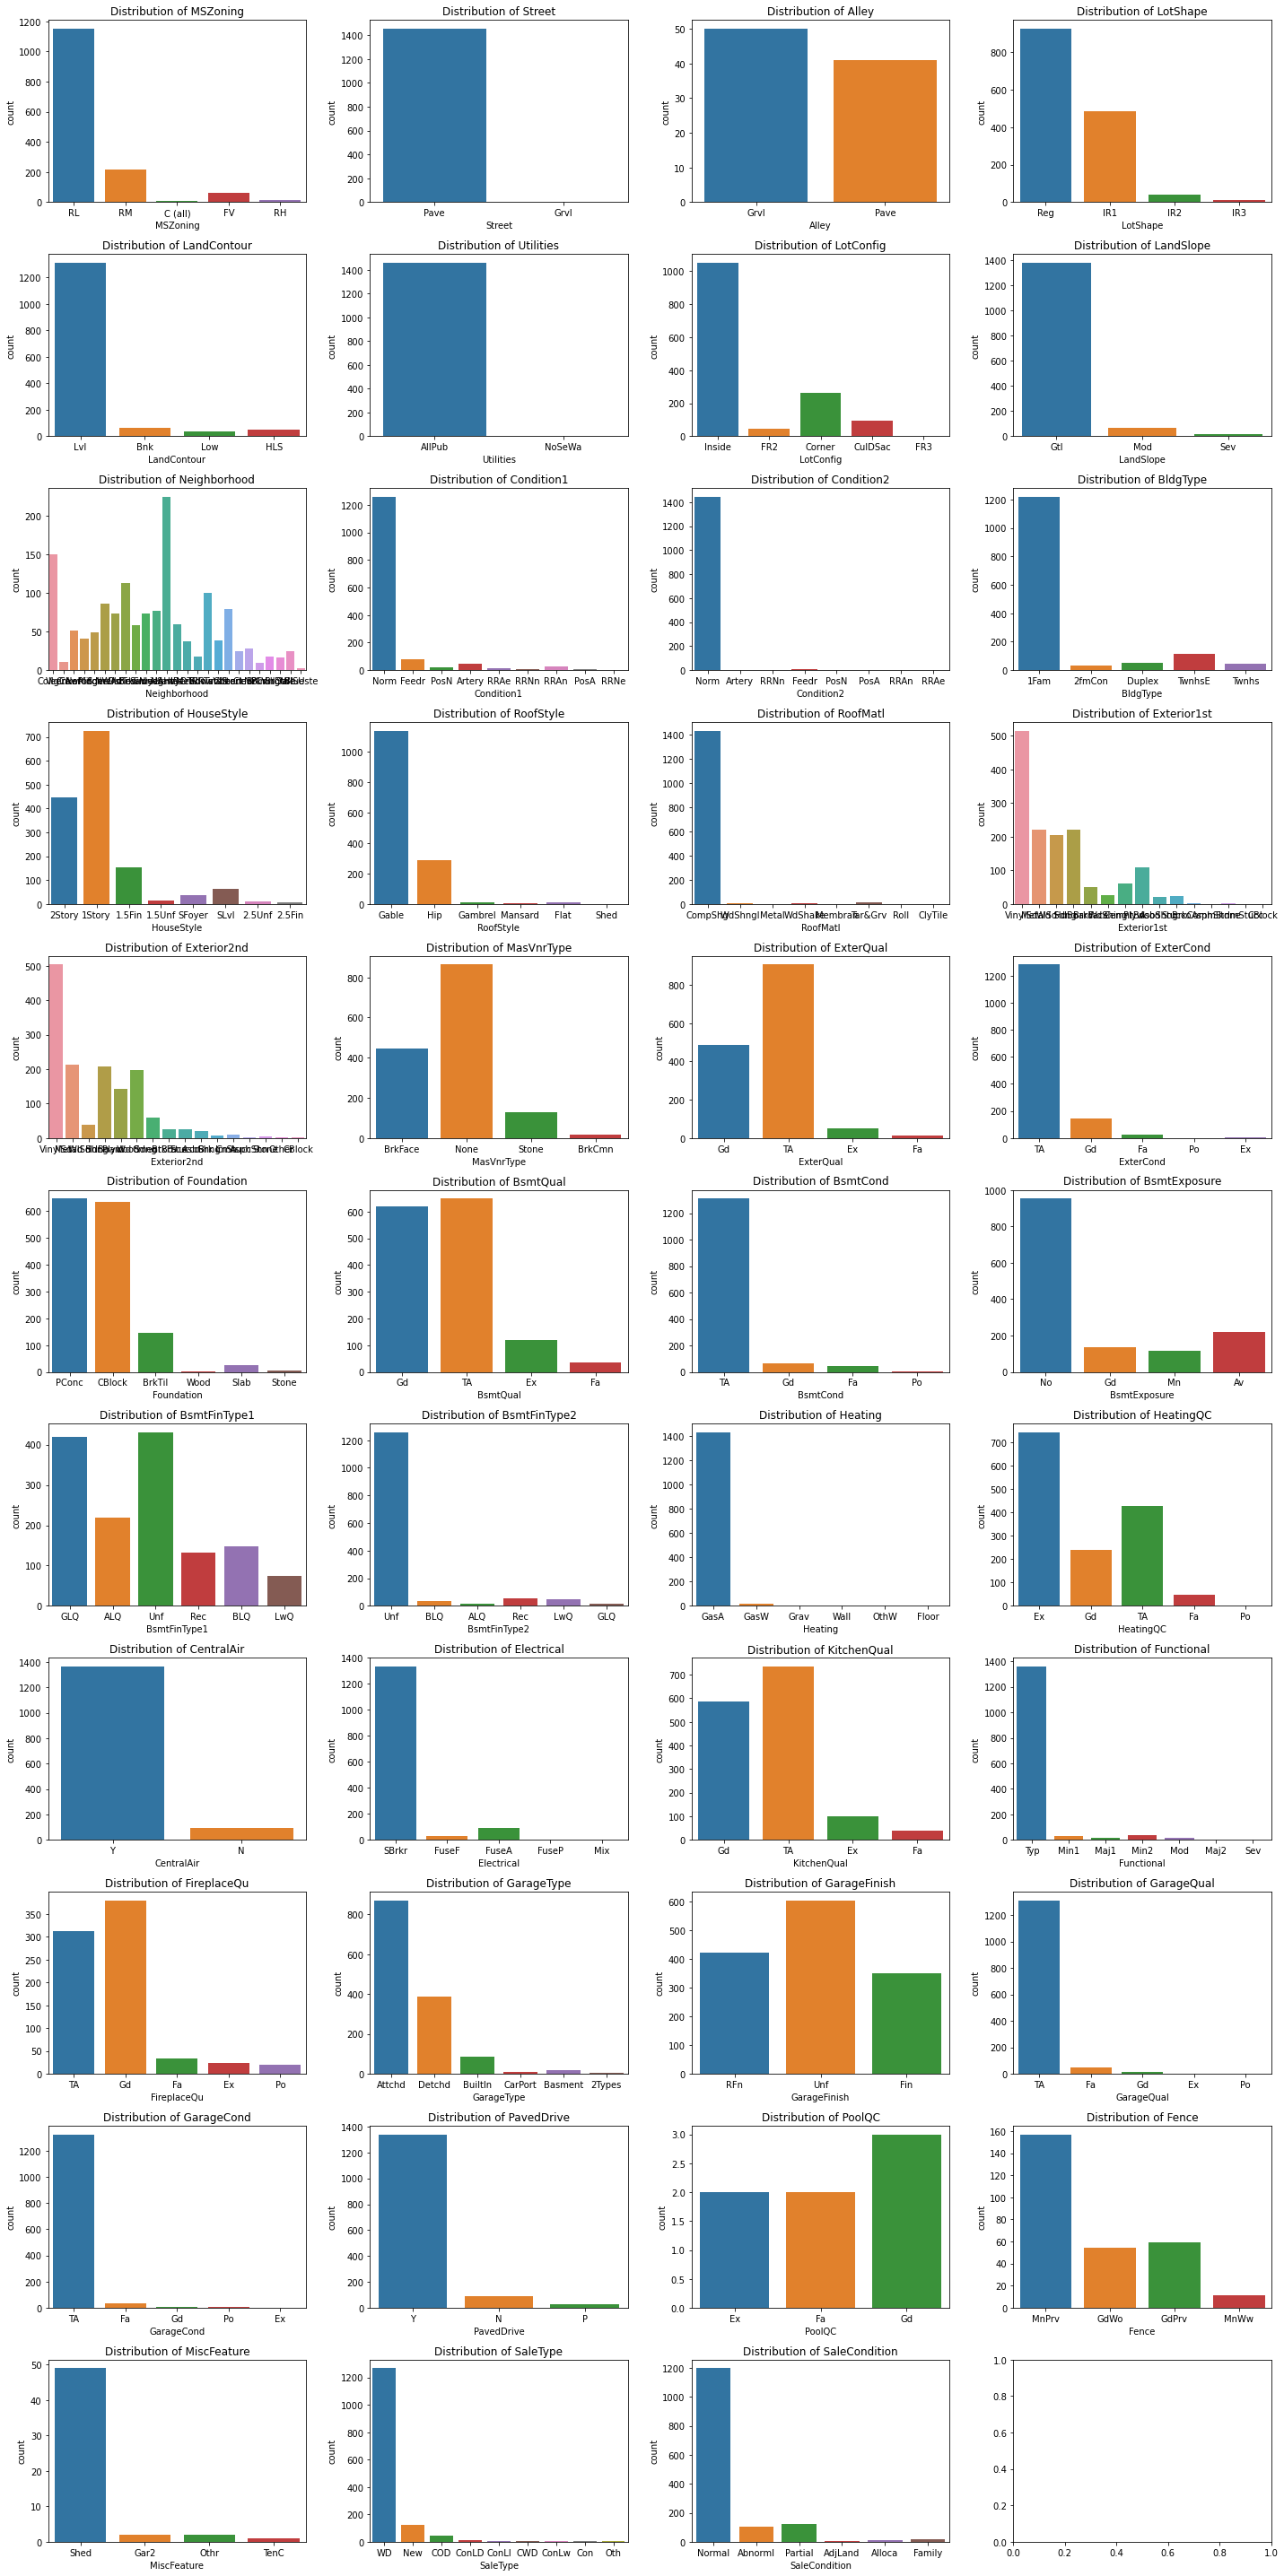

In [4]:
# View the distribution of categorical features
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20, 40))

for ax, col in zip(axes.flatten(), train_data.select_dtypes(include=['object'])):
    sns.countplot(train_data[col], ax=ax)
    ax.set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

In [5]:
# Step 3: Data Preprocessing

# Concatenate the training and test data
full_data = pd.concat([train_data, test_data]).reset_index(drop=True)

# Handle missing values
missing_data = full_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data_percent = missing_data / len(full_data)
missing_data_df = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percent'])
print(missing_data_df)

# Fill missing values in numerical columns with the median value
for col in full_data.select_dtypes(include=[np.number]):
    full_data[col].fillna(full_data[col].median(), inplace=True)

# Fill missing values in categorical columns with the mode value
for col in full_data.select_dtypes(include=['object']):
    full_data[col].fillna(full_data[col].mode()[0], inplace=True)

# Convert categorical variables into numerical ones
le = LabelEncoder()
for col in full_data.select_dtypes(include=['object']):
    full_data[col] = le.fit_transform(full_data[col])

# Create new features
full_data['TotalSF'] = full_data['TotalBsmtSF'] + full_data['1stFlrSF'] + full_data['2ndFlrSF']
full_data['TotalBathrooms'] = full_data['FullBath'] + 0.5 * full_data['HalfBath'] + full_data['BsmtFullBath'] + 0.5 * full_data['BsmtHalfBath']
full_data['TotalPorchSF'] = full_data['OpenPorchSF'] + full_data['EnclosedPorch'] + full_data['3SsnPorch'] + full_data['ScreenPorch']

# Split the full_data back into train and test data
train_data = full_data.iloc[:len(train_data)]
test_data = full_data.iloc[len(train_data):].drop('SalePrice', axis=1)

              Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
SalePrice      1459  0.499829
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageCond      159  0.054471
GarageYrBlt     159  0.054471
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageType      157  0.053786
BsmtExposure     82  0.028092
BsmtCond         82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
Functional        2  0.000685
BsmtHalfBath      2  0.000685
BsmtFullBath      2  0.000685
Utilities         2  0.000685
KitchenQual       1  0.000343
TotalBsmtSF       1  0.000343
BsmtUnfSF         1  0.000343
GarageCars        1  0.000343
GarageArea        1  0.000343
BsmtFinSF2        1  0.000343
BsmtFinSF1        1  0.000343
Exterior2nd       1  0.000343
Exterior1s

In [6]:
# Step 4: Data Splitting
# Split the dataset into training and validation sets
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Model Selection and evaluation

# Define three different models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the models
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Step 7: Model Evaluation

# Evaluate the models using multiple metrics
y_pred_lr = model_lr.predict(X_val)
y_pred_rf = model_rf.predict(X_val)
y_pred_xgb = model_xgb.predict(X_val)


# RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))

# R-squared
r2_lr = r2_score(y_val, y_pred_lr)
r2_rf = r2_score(y_val, y_pred_rf)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

# Explained Variance Score
evs_lr = explained_variance_score(y_val, y_pred_lr)
evs_rf = explained_variance_score(y_val, y_pred_rf)
evs_xgb = explained_variance_score(y_val, y_pred_xgb)

# Create a table to summarize the performance of each model
from tabulate import tabulate

table = [
    ['Linear Regression', rmse_lr, r2_lr, mae_lr, evs_lr],
    ['Random Forest', rmse_rf, r2_rf, mae_rf, evs_rf],
    ['XGBoost', rmse_xgb, r2_xgb, mae_xgb, evs_xgb]
]

headers = ['Model', 'RMSE', 'R-squared', 'MAE', 'Explained Variance Score']

print(tabulate(table, headers=headers))

Model                 RMSE    R-squared      MAE    Explained Variance Score
-----------------  -------  -----------  -------  --------------------------
Linear Regression  36597.3     0.825384  21422.1                    0.82693
Random Forest      29552.7     0.886138  18142.1                    0.886154
XGBoost            28147.3     0.89671   16809.5                    0.896714


         Feature  Importance
17   OverallQual    0.417389
80       TotalSF    0.230940
30      BsmtQual    0.036535
52  KitchenAbvGr    0.034252
61    GarageCars    0.030321
..           ...         ...
72        PoolQC    0.000000
48  BsmtHalfBath    0.000000
9      Utilities    0.000000
5         Street    0.000000
74   MiscFeature    0.000000

[83 rows x 2 columns]


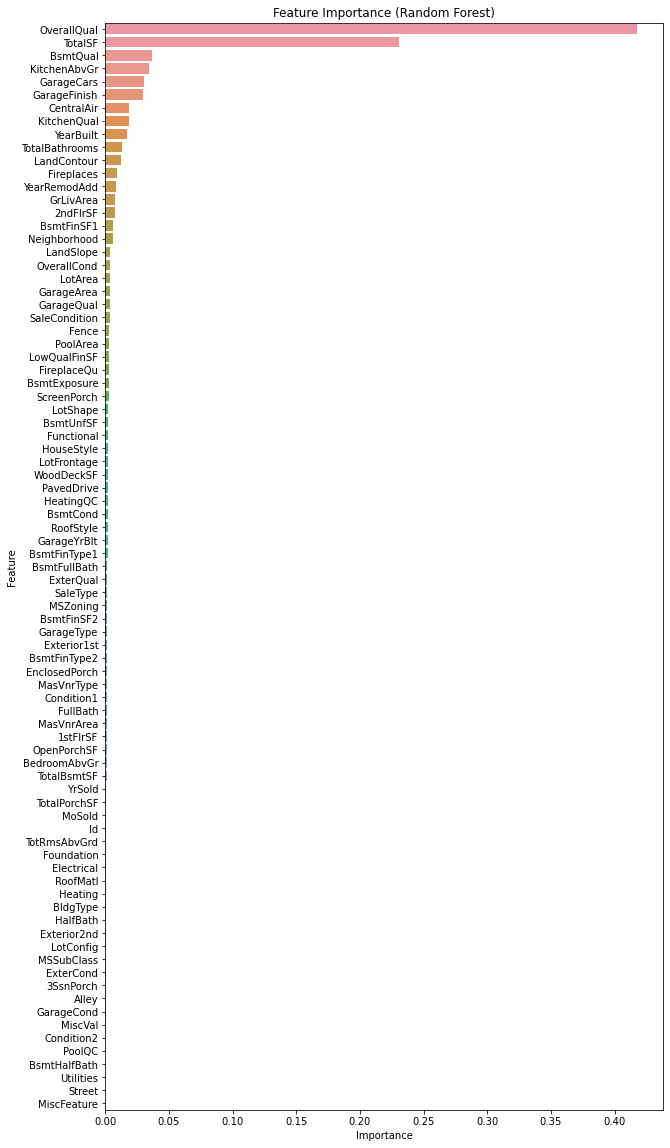

In [9]:
# Step 6: Feature Importance

# Get feature importance from XGB model
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model_xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [11]:
# Step 7: Making Predictions
test_predictions = model_xgb.predict(test_data)

In [12]:
print(test_predictions)

[125333.06 158664.66 194657.1  ... 167606.38 122017.29 227694.34]


In [13]:
# Create a submission dataframe
submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})

# Save the submission dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
print(os.getcwd())